In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statistics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

In [2]:
Filepath='C:/Users/shaha/Desktop/Springboard/Unit16/Cleaned_data II.csv'
df=pd.read_csv(Filepath)

In [3]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df=df.drop(['Unnamed: 0','reservation_status_date'], axis=1)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [ ]:
path='C:/Users/shaha/Desktop/Springboard/Unit18/Project/Cleaned_data III.csv'
df.to_csv(path)

In [6]:
df['meal'].value_counts()

BB           91863
HB           14433
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

In [7]:
df['reservation_status'].value_counts()

Check-Out    74744
Canceled     42950
No-Show       1203
Name: reservation_status, dtype: int64

In [8]:
#Imputing for undefined values of the column of meal 
df['meal']=df['meal'].replace('Undefined',statistics.mode(df['meal']))
df['meal'].value_counts()

BB    93028
HB    14433
SC    10638
FB      798
Name: meal, dtype: int64

--------Imputting appropriate numbers for No-Show values of the column of reservation_status ----------

In [9]:
df_initial=df.drop(['is_canceled'], axis=1)
df_initial.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [10]:
dfi=df_initial.drop('reservation_status',axis=1)
yi=df_initial['reservation_status']

In [11]:
dfi.select_dtypes('object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...,...
118892,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
118893,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient
118894,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient
118895,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


In [12]:
dflog=pd.get_dummies(dfi, columns=['hotel','arrival_date_month','meal','country','market_segment',
                                               'distribution_channel','reserved_room_type','assigned_room_type',
                                               'deposit_type','customer_type'], prefix='C')

In [13]:
X=dflog.values; y=(yi=='Check-Out').values
clf=LogisticRegression()
clf.fit(X,y)
X_prediction=dflog[yi=='No-Show']
y_pred=clf.predict(X_prediction)
print(y_pred.shape)
w=y_pred.reshape(1203,1)
y_temp=pd.DataFrame(w,columns=['reservation_status'])
y_temp.shape

(1203,)


C:\Users\shaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1203, 1)

In [14]:
y_temp=y_temp.replace(True,'Check-Out')
y_temp=y_temp.replace(False,'Canceled')
y_temp.value_counts()

reservation_status
Check-Out             886
Canceled              317
dtype: int64

In [15]:
yi=yi.astype(str)
yi.head(10)

0    Check-Out
1    Check-Out
2    Check-Out
3    Check-Out
4    Check-Out
5    Check-Out
6    Check-Out
7    Check-Out
8     Canceled
9     Canceled
Name: reservation_status, dtype: object

In [16]:
y_temp=y_temp.astype(str)
y_temp.head(10)

,reservation_status
0,Check-Out
1,Check-Out
2,Check-Out
3,Check-Out
4,Check-Out
5,Canceled
6,Canceled
7,Canceled
8,Check-Out
9,Canceled


In [17]:
#Assigning appropriate information for 'No-Show' values based on logistic regression
j=0
for k in range(118897):
    if yi[k]=='No-Show':
        yi.iloc[k]=y_temp.iloc[j][0]
        j=j+1

In [18]:
#For making sure regarding 'No-Show values'
yi.unique()

array(['Check-Out', 'Canceled'], dtype=object)

In [19]:
yi.value_counts()

Check-Out    75630
Canceled     43267
Name: reservation_status, dtype: int64

In [20]:
dfi['reservation_status']=yi

In [21]:
dfi.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [23]:
#Checking all avlues for column of 'reservation status'
dfi['is_canceled']=df['is_canceled']
dfi['reservation_status'].value_counts()

Check-Out    75630
Canceled     43267
Name: reservation_status, dtype: int64

In [25]:
#Saving the file on the H.D.D
path_for_csv_file='C:/Users/shaha/Desktop/Springboard/Unit18/Project/Cleaned_data IV.csv'
dfi.to_csv(path_for_csv_file)

********************************Now we can start modelling based on complete dataset********************************

Modelling based on ridge method

In [26]:
df_backup=dfi

In [27]:
#Coverting months to numbers
for j in range(118897):
    if df_backup['arrival_date_month'][j]=='January':
        df_backup['arrival_date_month'][j]=1
    if df_backup['arrival_date_month'][j]=='February':
        df_backup['arrival_date_month'][j]=2
    if df_backup['arrival_date_month'][j]=='March':
        df_backup['arrival_date_month'][j]=3
    if df_backup['arrival_date_month'][j]=='April':
        df_backup['arrival_date_month'][j]=4
    if df_backup['arrival_date_month'][j]=='May':
        df_backup['arrival_date_month'][j]=5
    if df_backup['arrival_date_month'][j]=='June':
        df_backup['arrival_date_month'][j]=6
    if df_backup['arrival_date_month'][j]=='July':
        df_backup['arrival_date_month'][j]=7
    if df_backup['arrival_date_month'][j]=='August':
        df_backup['arrival_date_month'][j]=8
    if df_backup['arrival_date_month'][j]=='September':
        df_backup['arrival_date_month'][j]=9
    if df_backup['arrival_date_month'][j]=='October':
        df_backup['arrival_date_month'][j]=10
    if df_backup['arrival_date_month'][j]=='November':
        df_backup['arrival_date_month'][j]=11
    if df_backup['arrival_date_month'][j]=='December':
        df_backup['arrival_date_month'][j]=12

C:\Users\shaha\AppData\Local\Temp/ipykernel_15620/792187480.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backup['arrival_date_month'][j]=7
C:\Users\shaha\AppData\Local\Temp/ipykernel_15620/792187480.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backup['arrival_date_month'][j]=8
C:\Users\shaha\AppData\Local\Temp/ipykernel_15620/792187480.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backup['arrival_date_mo

In [28]:
df=df_backup
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_canceled
0,Resort Hotel,342,2015,7,27,1,0,0,2,0.0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,0
1,Resort Hotel,737,2015,7,27,1,0,0,2,0.0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,0
2,Resort Hotel,7,2015,7,27,1,0,1,1,0.0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,0
3,Resort Hotel,13,2015,7,27,1,0,1,1,0.0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,0
4,Resort Hotel,14,2015,7,27,1,0,2,2,0.0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,0


In [29]:
#Generation dummies for the full dataset
df_dummies_ML=pd.get_dummies(df, columns=['hotel','meal','country','market_segment',
                                               'distribution_channel','reserved_room_type','assigned_room_type',
                                               'deposit_type','customer_type','reservation_status'], prefix='C')
dfa=df_dummies_ML[(df_dummies_ML['arrival_date_year']==2017)]
index_list=(dfa[(dfa['arrival_date_month']==4) | (dfa['arrival_date_month']==5) | 
                (dfa['arrival_date_month']==6) | (dfa['arrival_date_month']==7) | 
                (dfa['arrival_date_month']==8)]).index
df_temp=df_dummies_ML.drop(index=index_list, axis=0)
X_ML=df_temp.drop('is_canceled', axis=1)
y_ML=df_temp['is_canceled']
X_five=(dfa[(dfa['arrival_date_month']==4) | (dfa['arrival_date_month']==5) | 
                (dfa['arrival_date_month']==6) | (dfa['arrival_date_month']==7) | 
                (dfa['arrival_date_month']==8)]).drop(columns='is_canceled', axis=1)
y_five=dfa[(dfa['arrival_date_month']==4) | (dfa['arrival_date_month']==5) | 
                (dfa['arrival_date_month']==6) | (dfa['arrival_date_month']==7) | 
                (dfa['arrival_date_month']==8)]['is_canceled']
y_five_series=y_five.values

In [34]:
X=X_ML.values
y=y_ML.values
la=[0.1,1,10,100,1000]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
for a in la:
    ridge=Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred=ridge.predict(X_test)
    print('alpha=',a,'  score=',ridge.score(X_test, y_test))

alpha= 0.1   score= 0.9657328018649981
alpha= 1   score= 0.9658014857152563
alpha= 10   score= 0.96601033998456
alpha= 100   score= 0.9660239838787819
alpha= 1000   score= 0.9641476014642453


In [35]:
#Modelling based on Ridge method
for a in la:
    ridge=Ridge(alpha=a)
    kf=KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results=cross_val_score(ridge,X_train,y_train, cv=kf)
    print('alpha=',a, '  scores=',cv_results)

alpha= 0.1   scores= [0.96578229 0.95659825 0.96103589 0.96633268 0.9656778  0.96702555]
alpha= 1   scores= [0.96575318 0.95666362 0.96103526 0.96658203 0.96576389 0.96704489]
alpha= 10   scores= [0.96551097 0.95689789 0.96098255 0.9667331  0.96588149 0.96686136]
alpha= 100   scores= [0.96491802 0.95708088 0.96079326 0.9666322  0.96558561 0.96624792]
alpha= 1000   scores= [0.96228211 0.95517286 0.95840427 0.96425019 0.96280462 0.96338785]


# According to the analysis alpha=1 is the best case

In [36]:
#According to the analysis alpha=1 is the best case
ridge=Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
y_pred

array([0.01208507, 0.00562024, 0.99603377, ..., 0.98179259, 0.01797081,
       0.00501596])

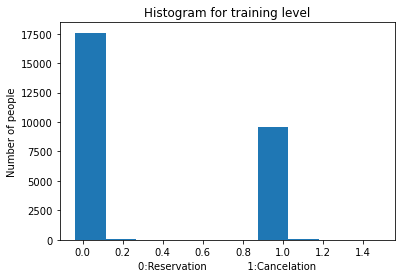

In [37]:
plt.hist(y_pred)
plt.title('Histogram for training level')
plt.xlabel('0:Reservation             1:Cancelation')
plt.ylabel('Number of people')
plt.show() 

In [38]:
#Prediction for five months of year 2017
X_Prediction=X_five.values
y_Prediction=ridge.predict(X_Prediction)
y_Prediction

array([ 9.97375124e-01,  9.76120865e-01,  9.76166769e-01, ...,
        5.56570260e-04,  8.50570046e-03, -2.77245020e-03])

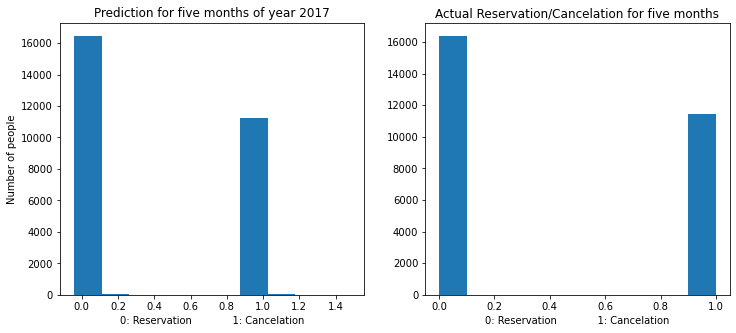

In [39]:
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for five months of year 2017')
ax[1].set_title('Actual Reservation/Cancelation for five months')
ax[0].set_xlabel('0: Reservation             1: Cancelation')
ax[1].set_xlabel('0: Reservation             1: Cancelation')
ax[0].hist(y_Prediction)
ax[1].hist(y_five_series)
ax[0].set_ylabel('Number of people')
plt.show()

### Modelling based on lasso method

In [40]:
for a in la:
    lasso=Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred=lasso.predict(X_test)
    print('alpha=',a,'  score=',lasso.score(X_test, y_test))

alpha= 0.1   score= 0.7474767780039104
alpha= 1   score= 0.10296584800567343
alpha= 10   score= 0.06544743175426249
alpha= 100   score= -4.278334781426807e-05
alpha= 1000   score= -4.278334781426807e-05


In [41]:
for a in la:
    lasso=Lasso(alpha=a)
    kf=KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results=cross_val_score(lasso,X_train,y_train, cv=kf)
    print('alpha=',a, '  scores=',cv_results)

alpha= 0.1   scores= [0.75069175 0.74179153 0.74472731 0.74821366 0.74670795 0.74819979]
alpha= 1   scores= [0.1158522  0.10493972 0.10644843 0.10607908 0.10681817 0.10629032]
alpha= 10   scores= [0.07052697 0.06749594 0.06807381 0.06777784 0.06700719 0.06797642]
alpha= 100   scores= [-4.41920043e-06 -2.38354149e-07 -1.20382900e-05 -5.96344597e-05
 -3.28684661e-04 -7.51451314e-05]
alpha= 1000   scores= [-4.41920043e-06 -2.38354149e-07 -1.20382900e-05 -5.96344597e-05
 -3.28684661e-04 -7.51451314e-05]


In [42]:
#According to the analysis alpha=0.1 is the best case (Lasso method)
lasso=Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
y_pred

array([0.12250761, 0.10919221, 0.77241618, ..., 0.71153595, 0.11446877,
       0.14769085])

In [43]:
#Prediction for five months of year 2017
X_Prediction=X_five.values
y_Prediction=lasso.predict(X_Prediction)
y_Prediction=y_Prediction.round()

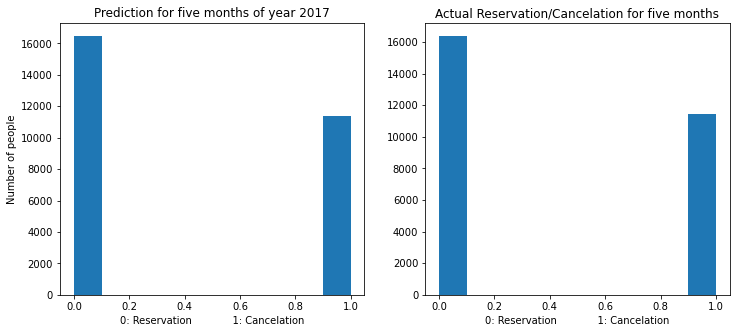

In [44]:
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for five months of year 2017')
ax[1].set_title('Actual Reservation/Cancelation for five months')
ax[0].set_xlabel('0: Reservation             1: Cancelation')
ax[1].set_xlabel('0: Reservation             1: Cancelation')
ax[0].hist(y_Prediction)
ax[1].hist(y_five_series)
ax[0].set_ylabel('Number of people')
plt.show()

### Gridsearchcv method

In [45]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
params={"alpha": np.arange(0.0001,1,10), "solver": ["sage", "lsqr"]}
ridge=Ridge(alpha=0.1)
ridge_cv=GridSearchCV(ridge, param_grid=params, cv=kf)
ridge_cv.fit(X_train, y_train)
print('Best parameters= ',ridge_cv.best_params_)
print('Best score= ',ridge_cv.best_score_)

C:\Users\shaha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shaha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\shaha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "C:\Users\shaha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

Best parameters=  {'alpha': 0.0001, 'solver': 'lsqr'}
Best score=  0.9584146205105636


Based on this analysis, the best parameters are: aplha=0.0001 and solver='lsqr'

In [46]:
#These parameters are applied for the machine learning
kf=KFold(n_splits=5, shuffle=True, random_state=42)
params={"alpha": [0.0001], "solver": ["lsqr"]}
ridge=Ridge(alpha=0.1)
ridge_cv=GridSearchCV(ridge, param_grid=params, cv=kf)
ridge_cv.fit(X_train, y_train)
y_pred=ridge_cv.predict(X_test)

Confusion matrix and classification report for Gridsearchcv command

In [47]:
y_pred=y_pred.round()

In [48]:
confusion_matrix(y_test, y_pred)

array([[17448,     0],
       [  221,  9649]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17448
           1       1.00      0.98      0.99      9870

    accuracy                           0.99     27318
   macro avg       0.99      0.99      0.99     27318
weighted avg       0.99      0.99      0.99     27318



In [51]:
#Prediction for five months of year 2017 based on GridSearchCV method
y_Prediction=ridge_cv.predict(X_Prediction)
y_Prediction=y_Prediction.round()

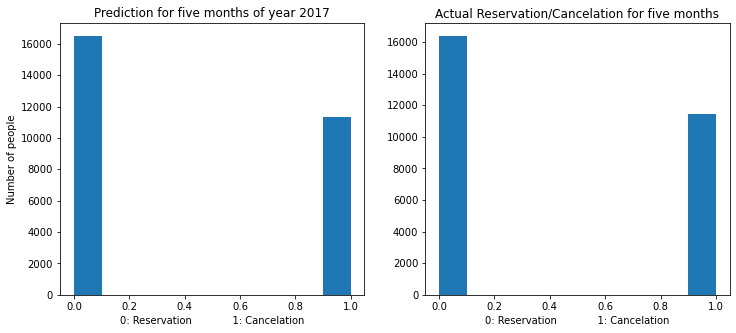

In [52]:
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for five months of year 2017')
ax[1].set_title('Actual Reservation/Cancelation for five months')
ax[0].set_xlabel('0: Reservation             1: Cancelation')
ax[1].set_xlabel('0: Reservation             1: Cancelation')
ax[0].hist(y_Prediction)
ax[1].hist(y_five_series)
ax[0].set_ylabel('Number of people')
plt.show()

### Randomforestclassifier method

In [53]:
for i in range(1,315,15):
    clf=RandomForestClassifier(n_estimators=i, max_depth=2)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print('n_estimators=', i)
    print(classification_report(y_test, y_pred))

n_estimators= 1
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     17448
           1       0.63      0.50      0.56      9870

    accuracy                           0.71     27318
   macro avg       0.69      0.67      0.67     27318
weighted avg       0.70      0.71      0.70     27318

n_estimators= 16
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17448
           1       1.00      0.98      0.99      9870

    accuracy                           0.99     27318
   macro avg       0.99      0.99      0.99     27318
weighted avg       0.99      0.99      0.99     27318

n_estimators= 31
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     17448
           1       1.00      0.49      0.66      9870

    accuracy                           0.82     27318
   macro avg       0.89      0.74      0.77     27318
weighted avg       0.86 

In [54]:
#According to this analysis n_estimators=16 is the best case
clf=RandomForestClassifier(n_estimators=16, max_depth=2)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

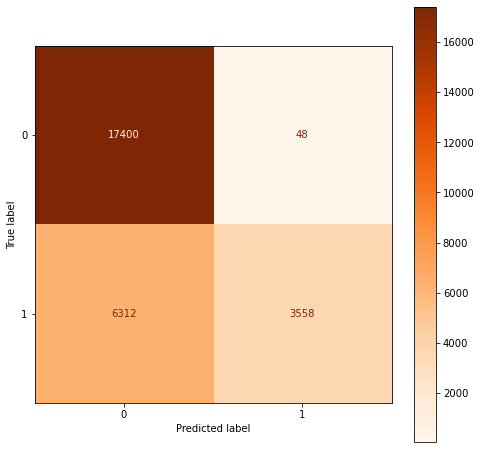

In [55]:
fig,ax=plt.subplots(figsize=(8,8))
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Oranges, ax=ax)
plt.show()

In [56]:
#Prediction for last five months of year 2017
y_Prediction=clf.predict(X_Prediction)
y_Prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

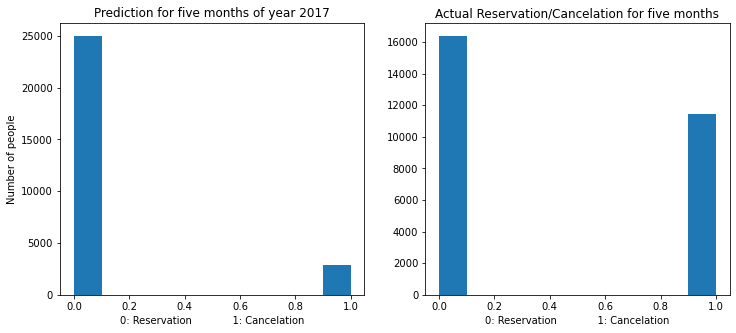

In [57]:
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for five months of year 2017')
ax[1].set_title('Actual Reservation/Cancelation for five months')
ax[0].set_xlabel('0: Reservation             1: Cancelation')
ax[1].set_xlabel('0: Reservation             1: Cancelation')
ax[0].hist(y_Prediction)
ax[1].hist(y_five_series)
ax[0].set_ylabel('Number of people')
plt.show()

In [58]:
for i in range (25,200,25):
    print('n_estimators=',i)
    clf=AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(classification_report(y_test, y_pred))

n_estimators= 25
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17448
           1       1.00      0.98      0.99      9870

    accuracy                           0.99     27318
   macro avg       0.99      0.99      0.99     27318
weighted avg       0.99      0.99      0.99     27318

n_estimators= 50
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17448
           1       1.00      0.98      0.99      9870

    accuracy                           0.99     27318
   macro avg       0.99      0.99      0.99     27318
weighted avg       0.99      0.99      0.99     27318

n_estimators= 75
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17448
           1       1.00      0.98      0.99      9870

    accuracy                           0.99     27318
   macro avg       0.99      0.99      0.99     27318
weighted avg       0.99

In [59]:
# n_estimators=25 is the best case
clf=AdaBoostClassifier(n_estimators=25)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [60]:
#Prediction
y_Prediction=clf.predict(X_Prediction)

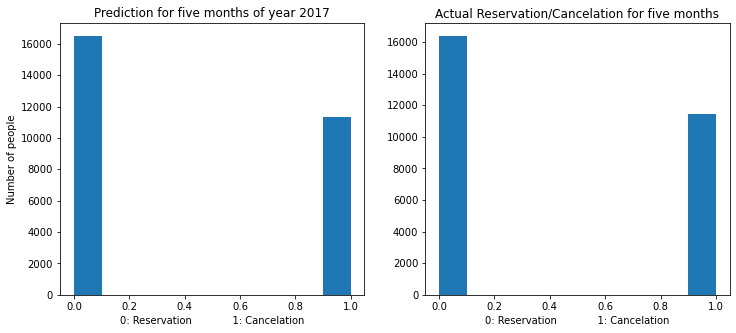

In [61]:
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for five months of year 2017')
ax[1].set_title('Actual Reservation/Cancelation for five months')
ax[0].set_xlabel('0: Reservation             1: Cancelation')
ax[1].set_xlabel('0: Reservation             1: Cancelation')
ax[0].hist(y_Prediction)
ax[1].hist(y_five_series)
ax[0].set_ylabel('Number of people')
plt.show()

### Conclusion

In [ ]:
#  According to this analysis the best models for this dataset are Ridge and AdaBoostClassifier methods.